In [25]:
%run "C:\Users\amayaa\OneDrive - John Keells Holdings PLC\Desktop\sampleuc\src\common\utils\runscipt.ipynb"

In [27]:
%run "C:\Users\amayaa\OneDrive - John Keells Holdings PLC\Desktop\sampleuc\src\model\run_scripts.ipynb"

In [29]:
conf=get_conf()
logger = set_logging_conf(conf)
transaction_df=get_transaction_info(conf) #getting trasaction table from conf
item_df=get_item_info(conf) #getting item table from conf
store_df=get_store_info(conf) #getting store table from conf
preprocess_transaction_df=preprocess_transaction(conf,transaction_df) 
preprocess_store_info_df=preprocess_store_info(store_df)
preprocess_item_info_df=preprocess_item_info(conf,item_df)
#top_5_categories=top_5_categories(preprocess_transaction_df, preprocess_item_info_df)
weekly_sales_df=weekly_sales_df(preprocess_transaction_df, preprocess_item_info_df)
week_df=get_week_df(preprocess_transaction_df)
outlet_df=outlets_df(preprocess_store_info_df)
top_15_cat_df=get_final_categories(preprocess_transaction_df, preprocess_item_info_df)
primary_key_table_df=create_primary_key_table(week_df, top_15_cat_df, outlet_df)
primary_key_with_weekly_sales_df=primary_key_with_weekly_sales(primary_key_table_df,weekly_sales_df)
target_variable_df=target_variable(primary_key_with_weekly_sales_df)


Columns in primary_key_table: ['week', 'stg_item_category_desc_txt', 'stg_outlet_cd']


In [30]:
target_variable_df.show()

+----------+--------------------------+-------------+----------------+-------------+
|      week|stg_item_category_desc_txt|stg_outlet_cd|weekly_sales_qty|next_week_qty|
+----------+--------------------------+-------------+----------------+-------------+
|2022-01-21|      Ambient Instant N...|            A|           703.0|        710.0|
|2022-01-28|      Ambient Instant N...|            A|           710.0|        609.0|
|2022-02-04|      Ambient Instant N...|            A|           609.0|        588.0|
|2022-02-11|      Ambient Instant N...|            A|           588.0|        718.0|
|2022-02-18|      Ambient Instant N...|            A|           718.0|        885.0|
|2022-02-25|      Ambient Instant N...|            A|           885.0|        765.0|
|2022-03-04|      Ambient Instant N...|            A|           765.0|        914.0|
|2022-03-11|      Ambient Instant N...|            A|           914.0|        773.0|
|2022-03-18|      Ambient Instant N...|            A|           7

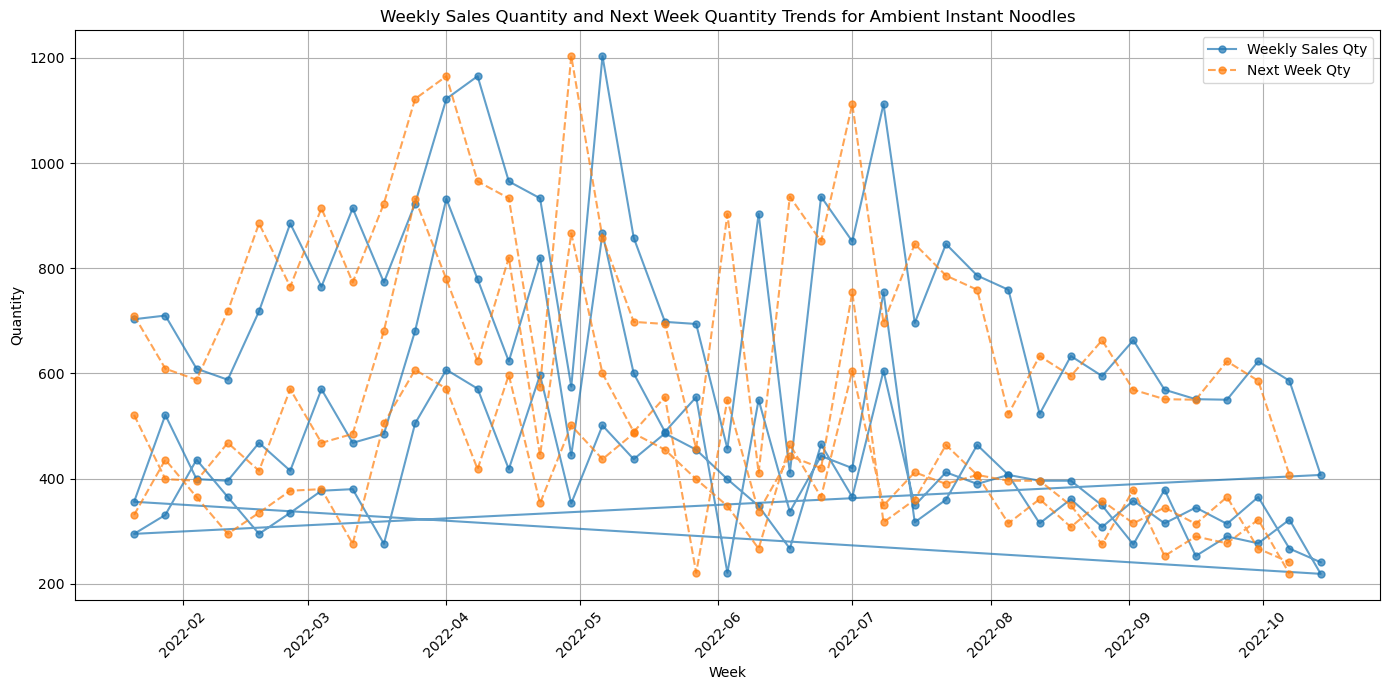

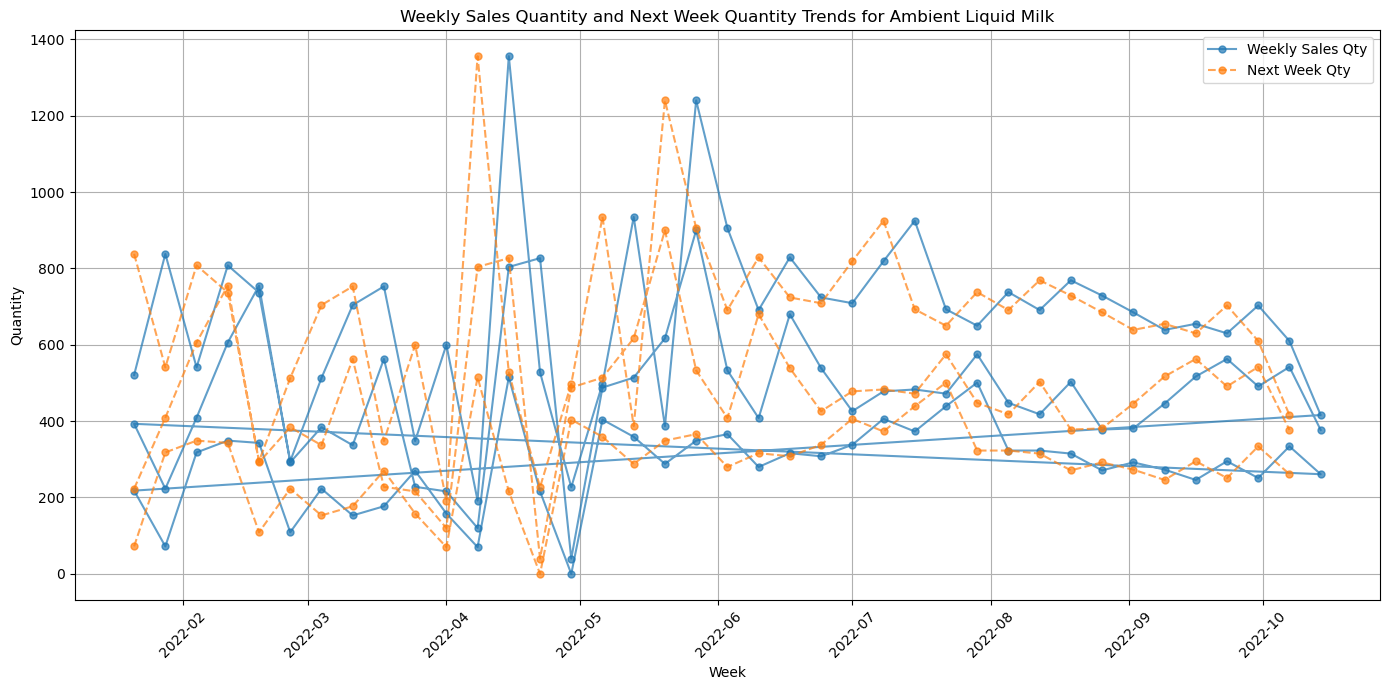

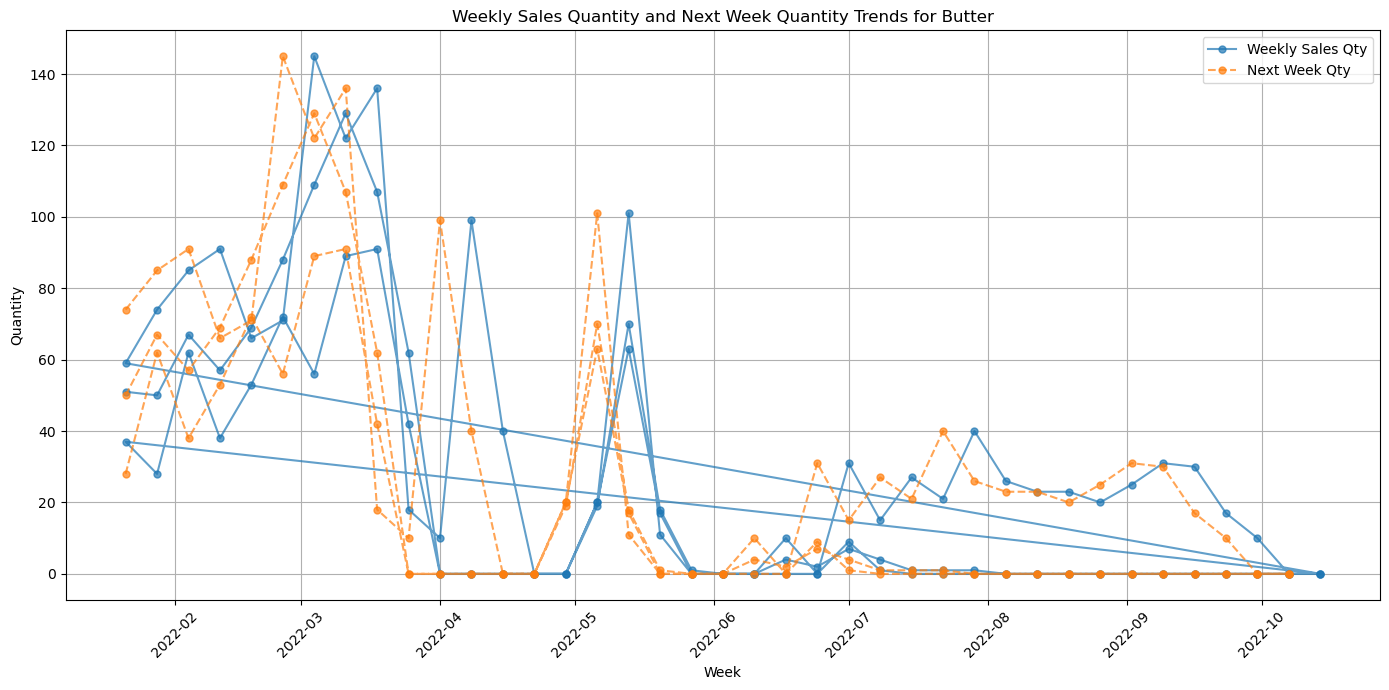

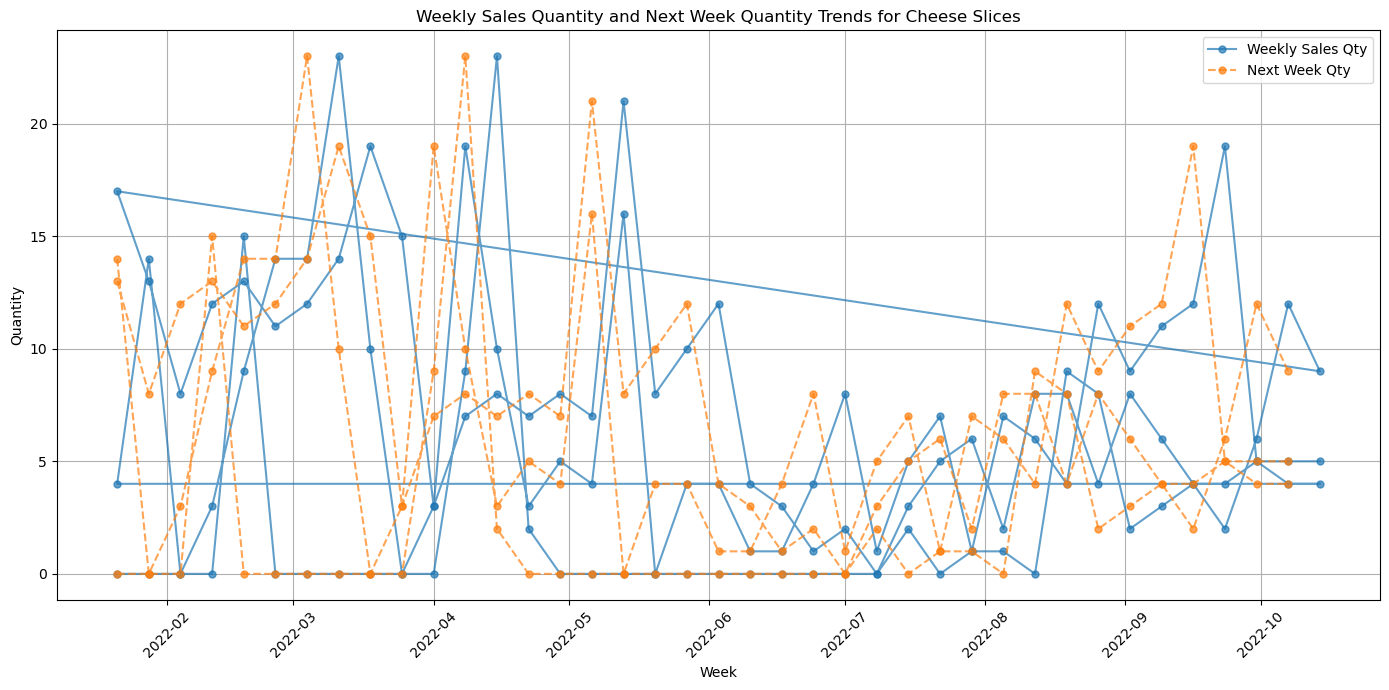

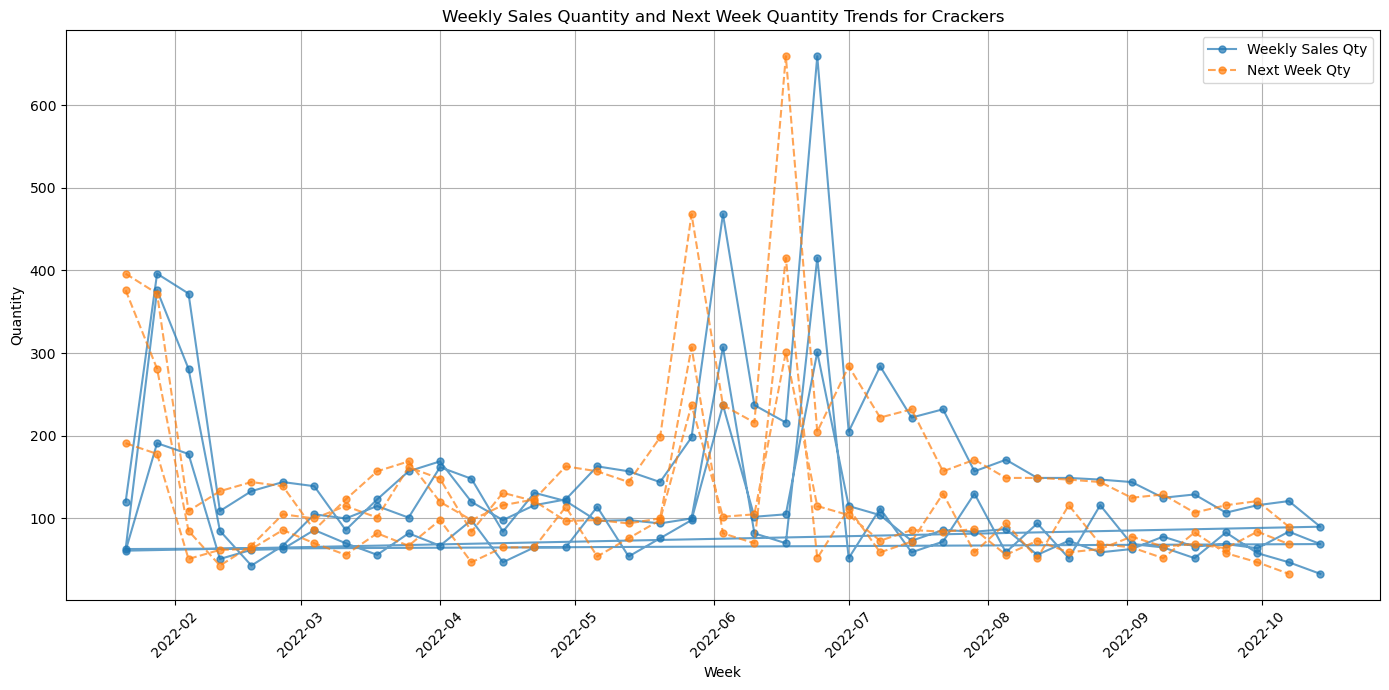

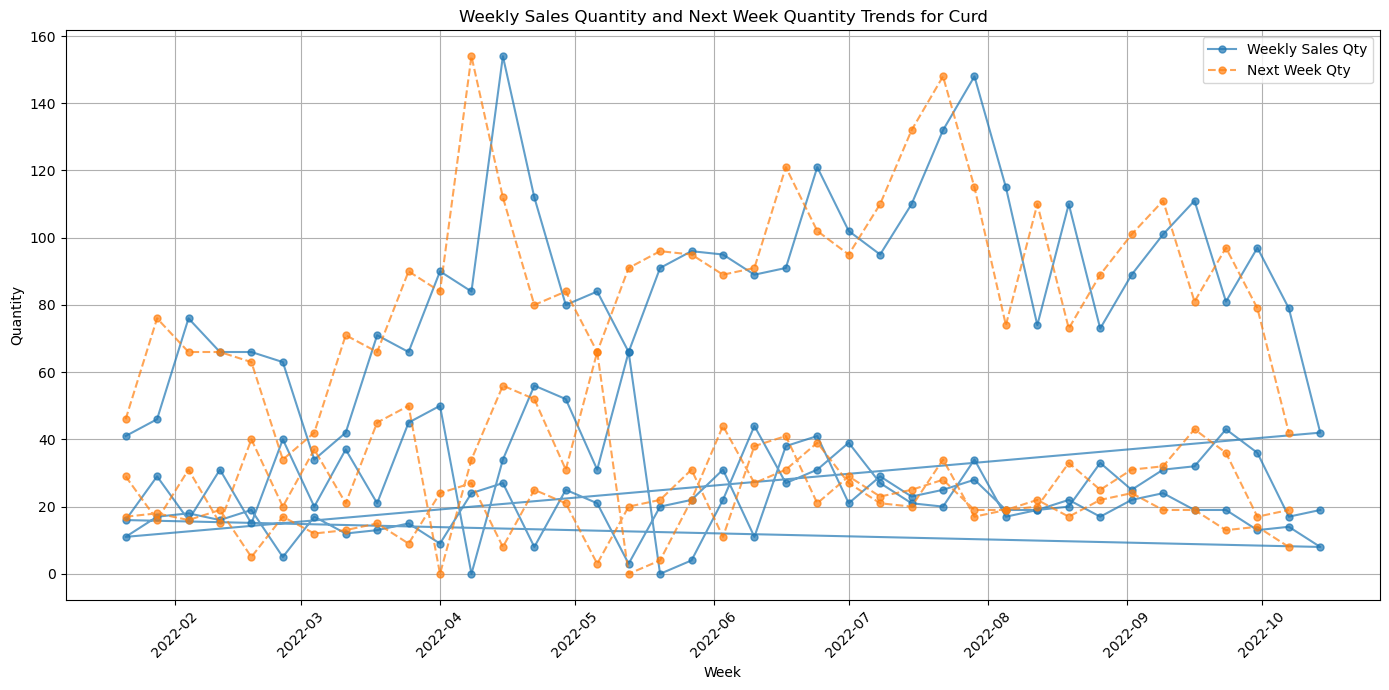

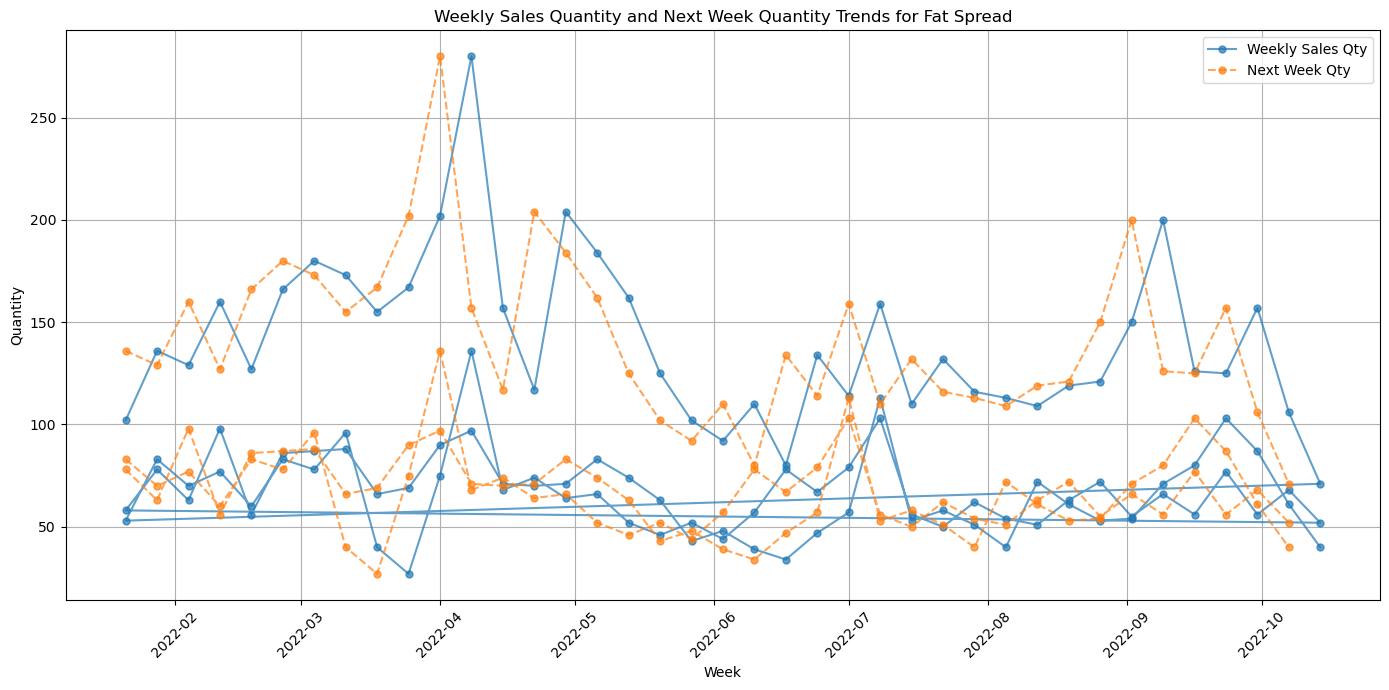

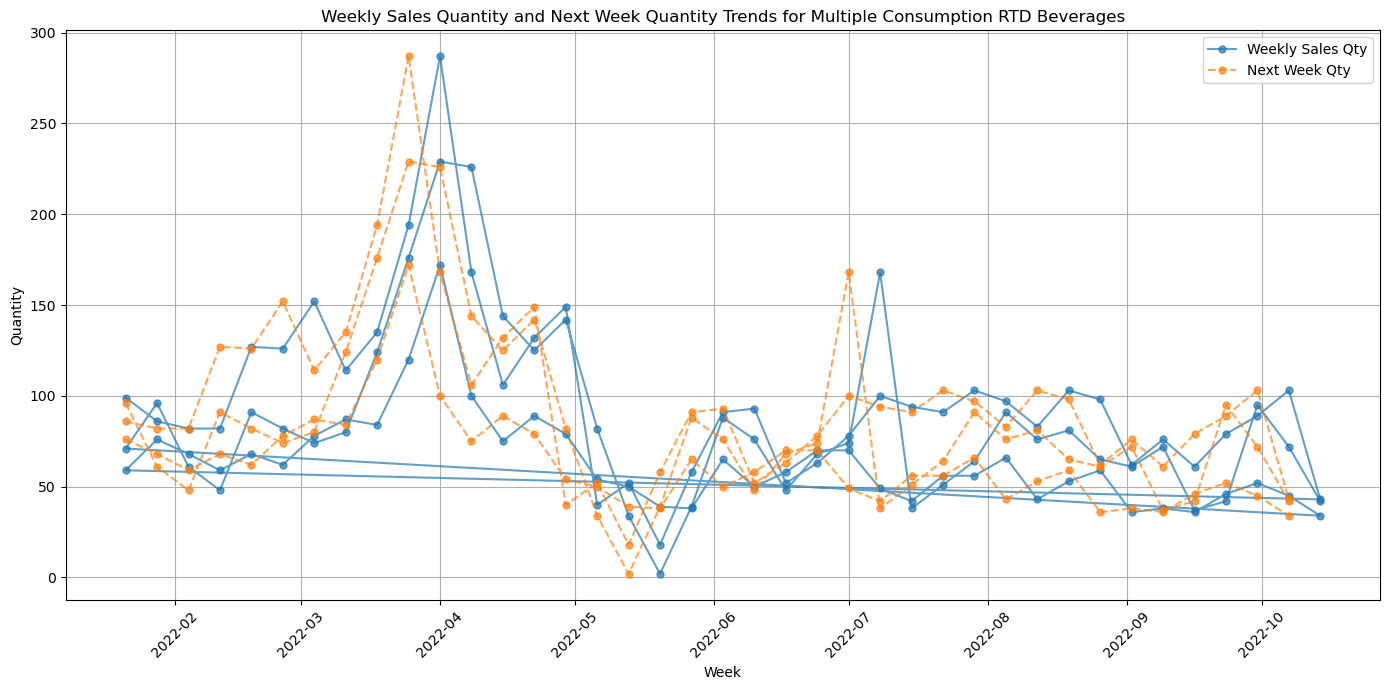

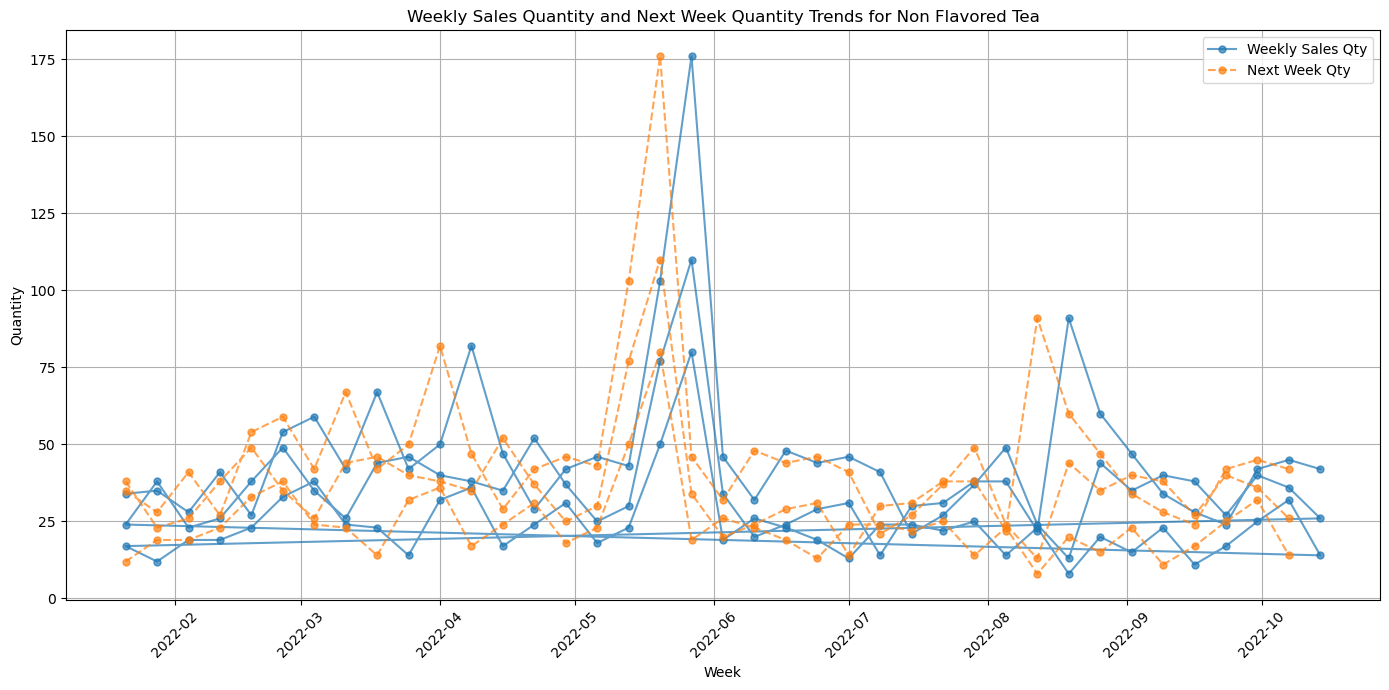

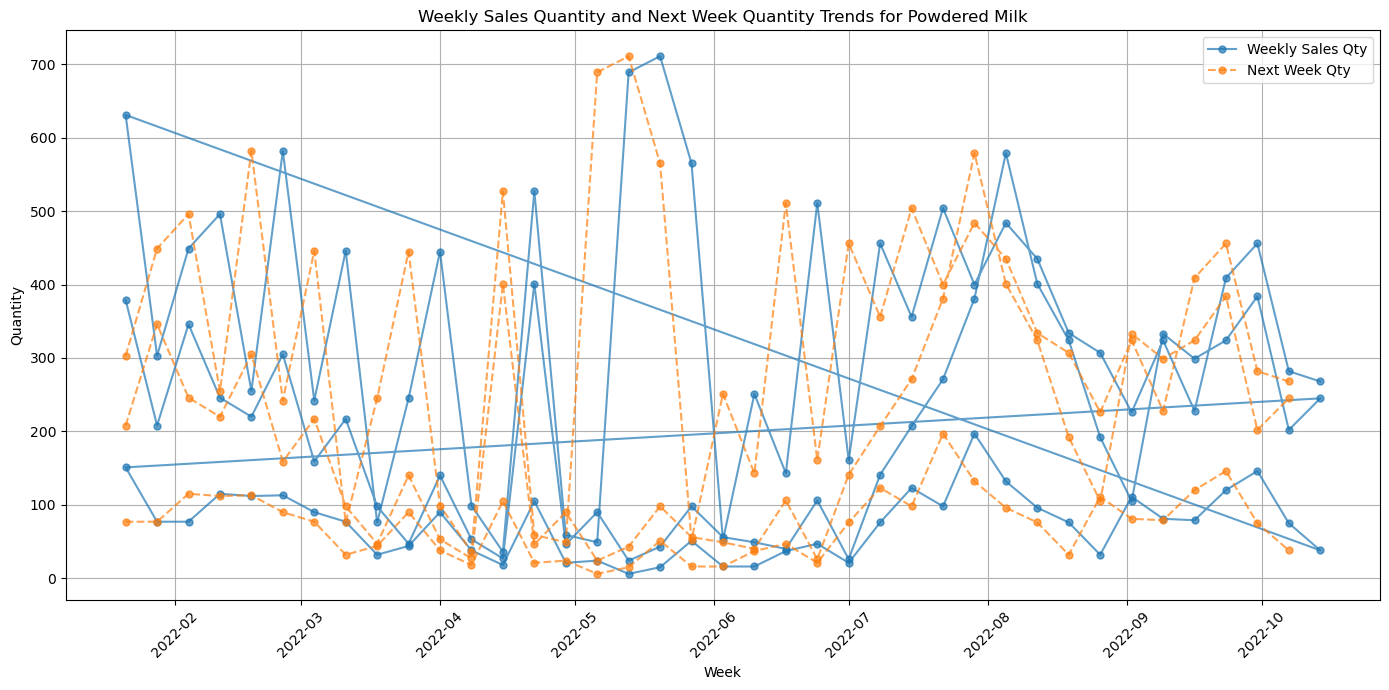

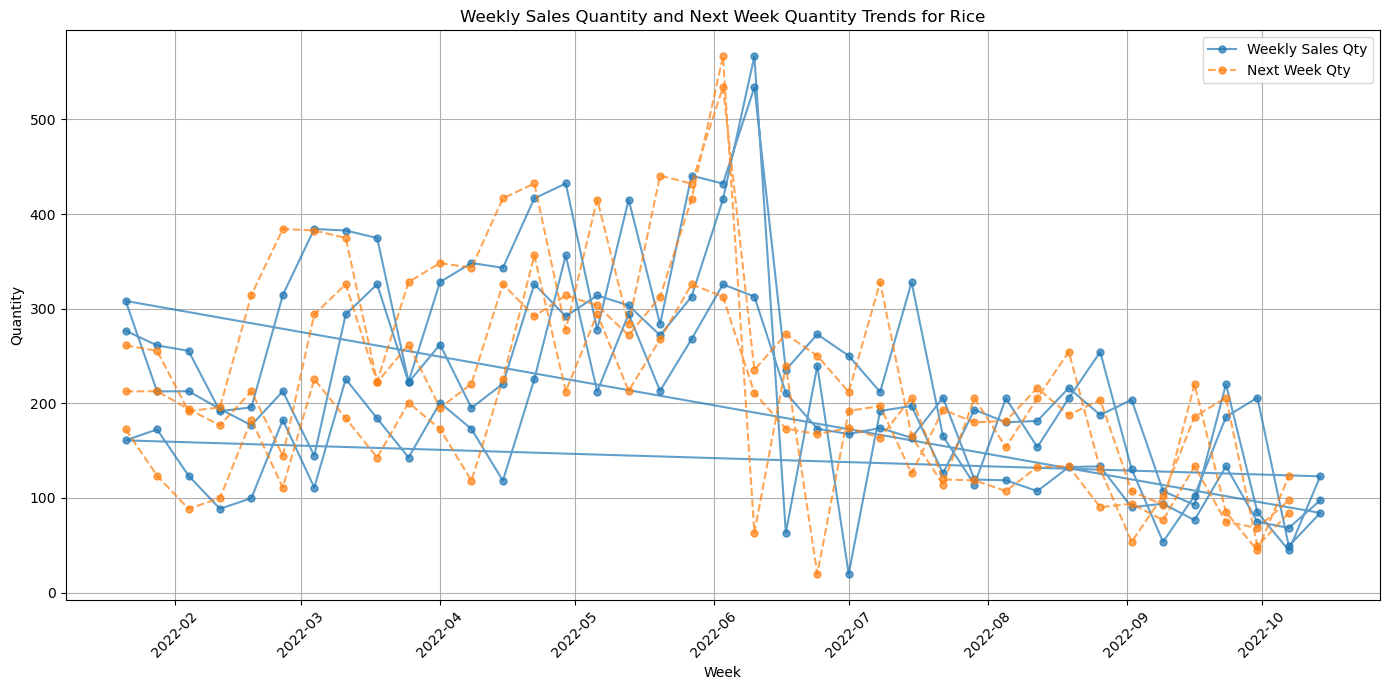

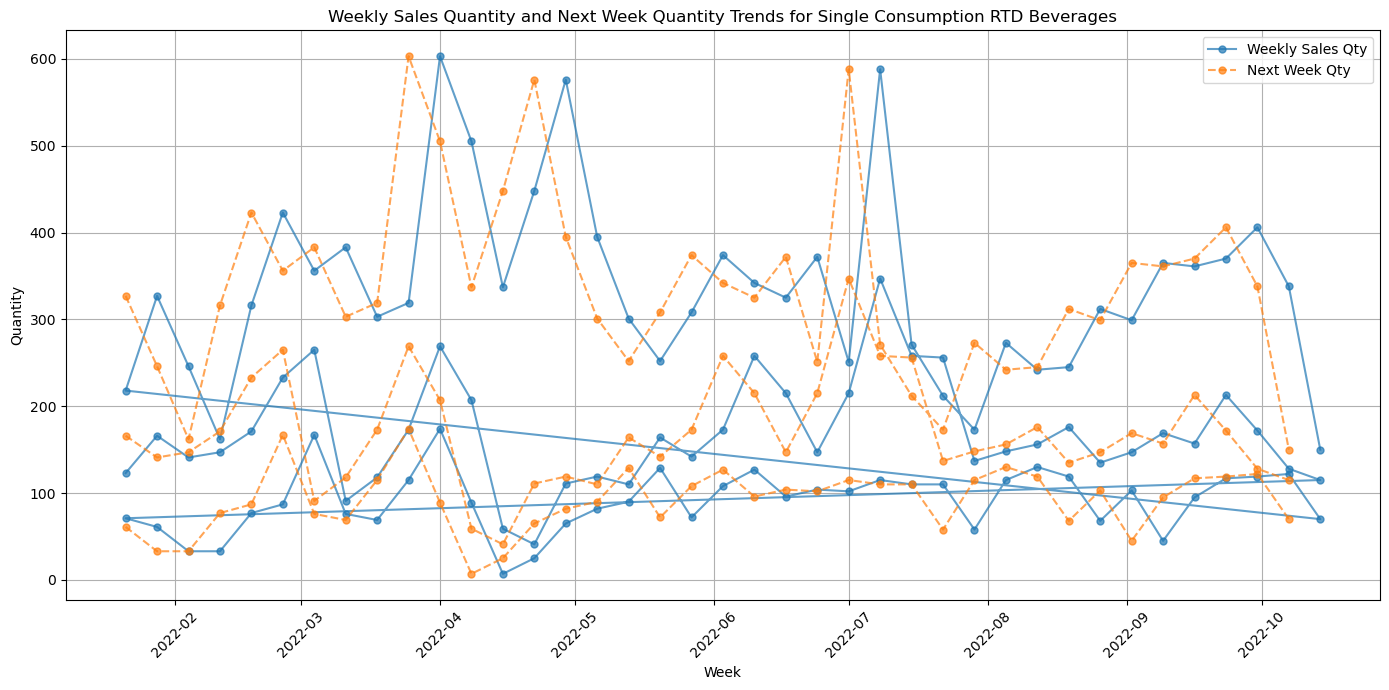

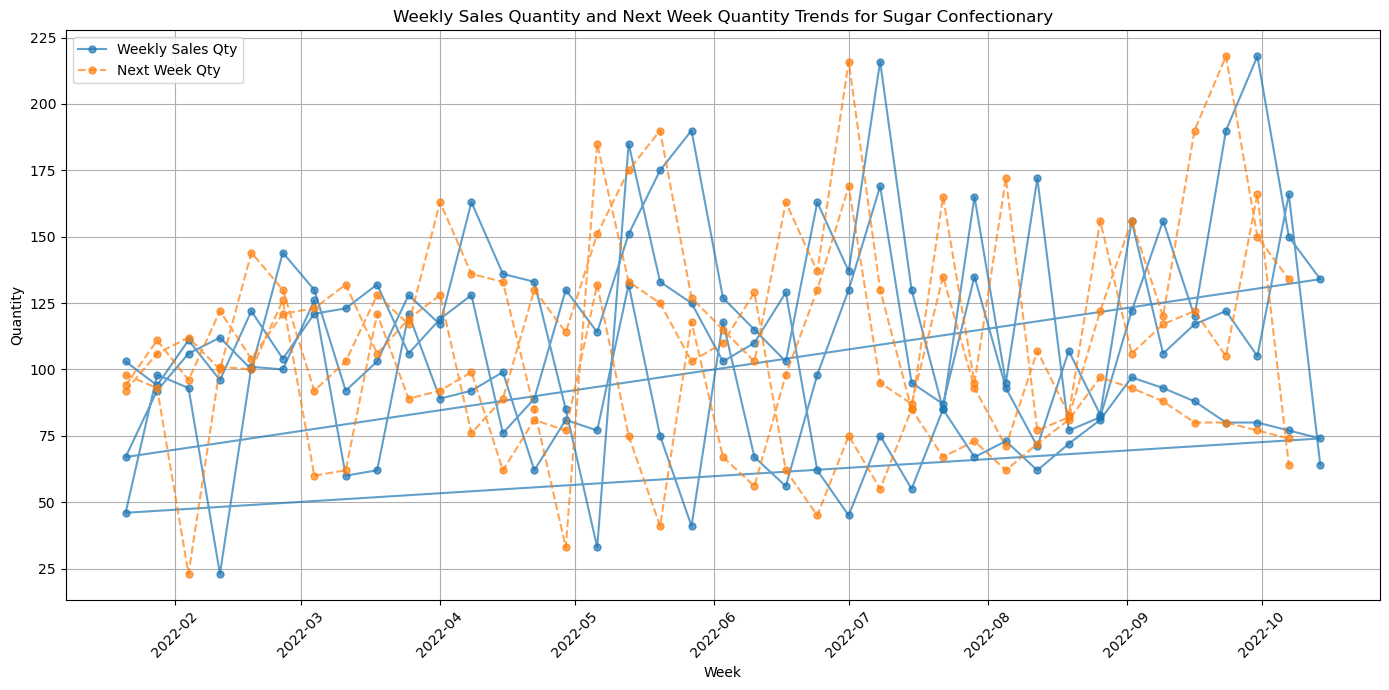

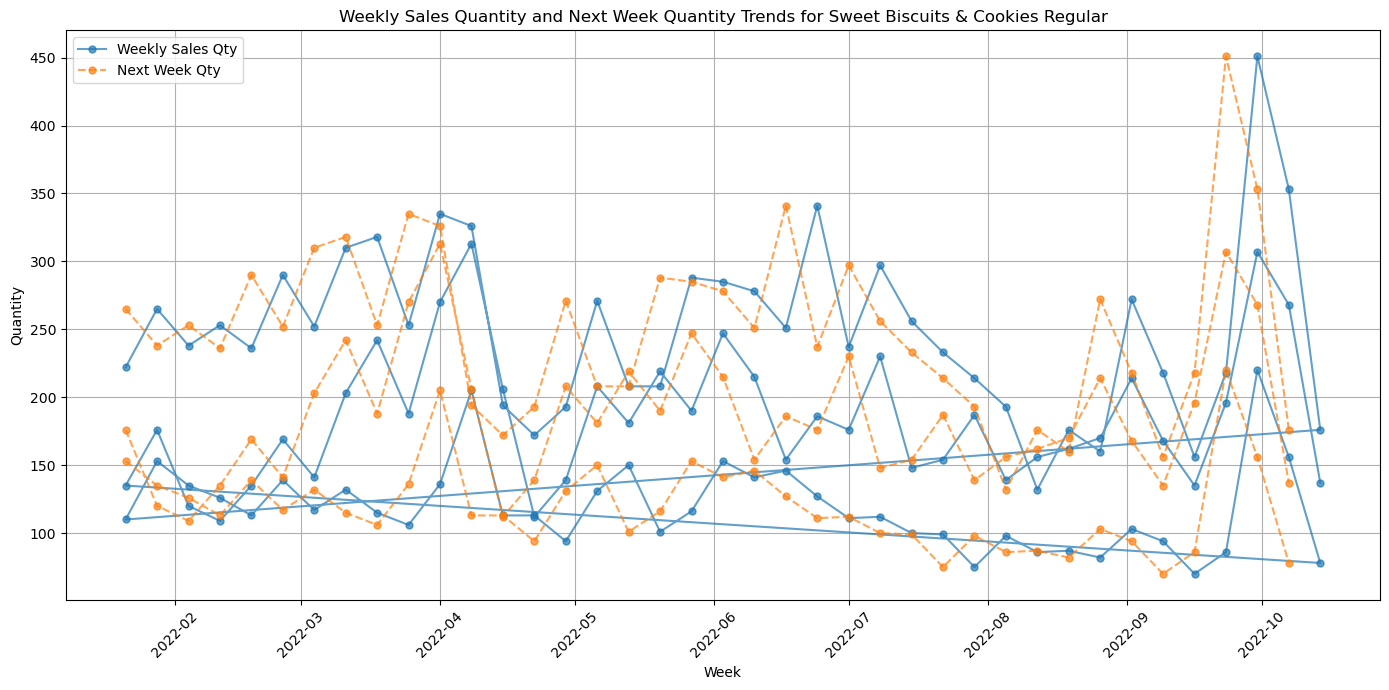

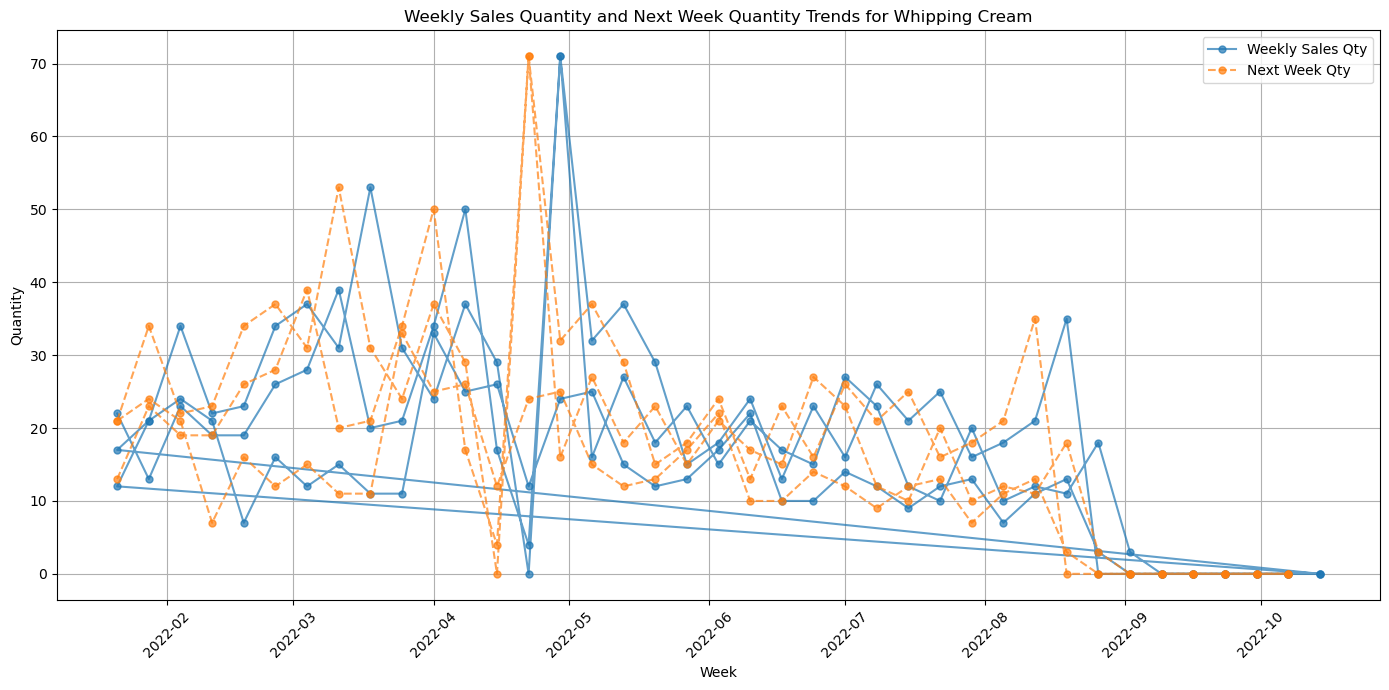

In [55]:
# Plot Weekly Sales Trends
# Convert to Pandas DataFrame for plotting
target_variable_df_pd = target_variable_df.toPandas()
# Plot Weekly Sales Trends with enhancements
# Get unique departments
departments = target_variable_df_pd['stg_item_category_desc_txt'].unique()

# Plot Weekly Sales Trends for each department
for department in departments:
    dept_df = target_variable_df_pd[target_variable_df_pd['stg_item_category_desc_txt'] == department]
    
    plt.figure(figsize=(14, 7))
    plt.plot(dept_df['week'], dept_df['weekly_sales_qty'], marker='o', label='Weekly Sales Qty', markersize=5, alpha=0.7)
    plt.plot(dept_df['week'], dept_df['next_week_qty'], marker='o', label='Next Week Qty', linestyle='--', markersize=5, alpha=0.7)
    
    plt.xlabel('Week')
    plt.ylabel('Quantity')
    plt.title(f'Weekly Sales Quantity and Next Week Quantity Trends for {department}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

In [37]:
target_variable_df_pd = target_variable_df.toPandas()

In [41]:
# Calculate correlation between weekly sales and next week's quantity
correlation = target_variable_df_pd['weekly_sales_qty'].corr(target_variable_df_pd['next_week_qty'])
print(f'Correlation between weekly sales quantity and next week quantity: {correlation}')


Correlation between weekly sales quantity and next week quantity: 0.8473728063787663
